In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run Funciones_CSPSA_SPSA.ipynb
%matplotlib inline

In [2]:
# Ganancias estandar considerando posibles fluctuaciones de la energia

#s = 0.602
#t = 0.101
#A = 0
#a = 3
#b = 0.1

# Ganancias estandar sin fluctuaciones de la energia

#s = 0.602
#t = 0.101
#A = 0
#a = 3
#b = 0.01



# Ganancias asintoticas

#s = 1
#t = 0.166
#A = 0
#a = 3
#b = 0.1


#Ganancias estandar

s = 0.602
t = 0.101
A = 0
b = 0.01



In [3]:
d = 2
nu_par = 1
NU_IT = 500

#A = np.sqrt(0.3)
#B = np.sqrt(0.2)
#C = np.sqrt(0.5)
A = 1
B = 3
C = 5

In [4]:
psi_est = estado(d,nu_par)

#psi_bloch = est_bloch(psi_est)[0]
#phase = float(est_bloch(psi_est)[1])
#theta = float(est_bloch(psi_est)[2])

In [5]:
H = H_paul(A,B,C)

In [6]:
fun = lambda x : exp_H(x, H)

In [7]:
a_CSPSA = ganancia_a_CSPSA(psi_est,25,fun,t,b)
a_SPSA = ganancia_a_SPSA(psi_est,25,fun,t,b)
a_SPSA_ang = ganancia_a_SPSA_ang(psi_est,25,fun,t,b)

In [8]:
# Ground-state Teórico

E = A**2 + B**2 + C**2

const1 = np.sqrt(1/2) * np.sqrt((A**2+B**2)/(E-C*(np.sqrt(E))))
const2 = (C-np.sqrt(E))/(A+1j*B)

#psi_teo = const1*np.matrix([[const2], [1]])
#fun(psi_teo)

Ground_teo = -(np.sqrt(A**2 + B**2 + C**2))
print(Ground_teo)

-5.916079783099616


In [9]:
#Result_CSPSA = CSPSA(psi_est, NU_IT, fun, fun, s, t, a, A, b)

In [10]:
#Result_SPSA = SPSA(psi_est, NU_IT, fun, fun, s, t, a, A, b)

In [11]:
#Result_SPSA_ang = SPSA_ang(psi_est, NU_IT, fun, fun, s, t, a, A, b)

In [12]:
#error_CSPSA = abs(Result_CSPSA - Ground_teo)
#error_SPSA = abs(Result_SPSA - Ground_teo)
#error_SPSA_ang = abs(Result_SPSA_ang - Ground_teo)

In [13]:
#plt.loglog(np.array(error_CSPSA[:]).T, label='CSPSA')
#plt.loglog(np.array(error_SPSA[:]).T, label='SPSA')
#plt.loglog(np.array(error_SPSA_ang[:]).T, label='SPSA_ang')
#plt.legend()

In [14]:
#plt.plot(np.array(Result_CSPSA[:]).T)
#plt.loglog(np.array(error_CSPSA[:]).T)

In [15]:
#plt.plot(np.array(Result_SPSA[:]).T)
#plt.loglog(np.array(error_SPSA[:]).T)

In [16]:
#plt.plot(np.array(Result_SPSA_ang[:]).T)
#plt.loglog(np.array(error_SPSA_ang[:]).T)

In [17]:
#plt.plot(np.array(Result_SPSA_ang[:]).T, label='SPSA_ang')
#plt.plot(np.array(Result_CSPSA[:]).T,label='CSPSA')
#plt.xlim(0,100)
#plt.ylim(-7,-4)
#plt.legend()

In [18]:
# numero de realizaciones para apromediar

num = 20


x = range(0,num)
y = len(x)


psi_est_ar = np.empty((y,d,1), dtype=np.csingle)
Result_CSPSA_ar = np.empty((y,1,NU_IT), dtype=np.single)
Result_SPSA_ar = np.empty((y,1,NU_IT), dtype=np.single)
Result_SPSA_ang_ar = np.empty((y,1,NU_IT), dtype=np.single)
error_CSPSA_ar = np.empty((y,1,NU_IT), dtype=np.single)
error_SPSA_ar = np.empty((y,1,NU_IT), dtype=np.single)
error_SPSA_ang_ar = np.empty((y,1,NU_IT), dtype=np.single)


In [19]:
# Crear ensamble de estados inciales

for i in x:
    psi_est_ar[i] = estado(d,nu_par)

In [20]:
def multiprocessing_func(i):
    Result_CSPSA_ar[i] = CSPSA(psi_est_ar[i], NU_IT, fun, fun, s, t, a_CSPSA, A, b)
    Result_SPSA_ar[i] = SPSA(psi_est_ar[i], NU_IT, fun, fun, s, t, a_SPSA, A, b)
    Result_SPSA_ang_ar[i] = SPSA_ang(psi_est_ar[i], NU_IT, fun, fun, s, t, a_SPSA_ang, A, b)
    
    error_CSPSA_ar[i] = abs(Result_CSPSA_ar[i] - Ground_teo)
    error_SPSA_ar[i] = abs(Result_SPSA_ar[i] - Ground_teo)
    error_SPSA_ang_ar[i] = abs(Result_SPSA_ang_ar[i] - Ground_teo)

In [21]:
for i in x: 
    multiprocessing_func(i)
    

In [22]:
Result_CSPSA_pro = np.sum(Result_CSPSA_ar, axis=0)/y
Result_SPSA_pro = np.sum(Result_SPSA_ar, axis=0)/y
Result_SPSA_ang_pro = np.sum(Result_SPSA_ang_ar, axis=0)/y
error_CSPSA_pro = np.sum(error_CSPSA_ar, axis=0)/y
error_SPSA_pro = np.sum(error_SPSA_ar, axis=0)/y
error_SPSA_ang_pro = np.sum(error_SPSA_ang_ar, axis=0)/y


In [23]:
#plt.loglog(np.array(error_CSPSA_pro[:]).T)

In [24]:
#plt.loglog(np.array(error_SPSA_pro[:]).T)

In [25]:
#plt.loglog(np.array(error_SPSA_ang_pro[:]).T)

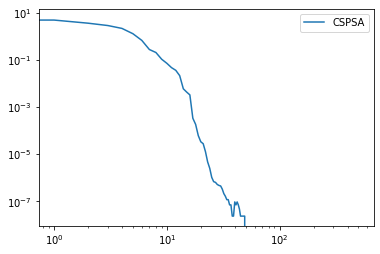

In [51]:
plt.loglog(np.array(error_CSPSA_pro[:]).T, label='CSPSA')

plt.legend()

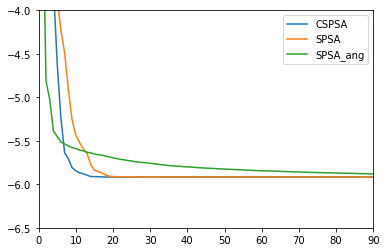

In [50]:
plt.plot(np.array(Result_CSPSA_pro[:]).T,label='CSPSA')
plt.plot(np.array(Result_SPSA_pro[:]).T, label='SPSA')
plt.plot(np.array(Result_SPSA_ang_pro[:]).T, label='SPSA_ang')

#plt.xlim(0,90)
#plt.ylim(-6.5,-4)
plt.legend()

In [28]:
#np.savetxt('prueba.txt', Result_SPSA, delimiter=',')
#print(Result_SPSA)

In [32]:
#np.savetxt('prueba.txt', Result_CSPSA, delimiter=',')
#print(Result_CSPSA)

In [30]:
#np.savetxt('prueba.txt', Result_SPSA_ang, delimiter=',')
#print(Result_SPSA_ang)

In [41]:
a = 3

Result_CSPSA = CSPSA(psi_est, NU_IT, fun, fun, s, t, a, A, b)
Result_CSPSA2 = CSPSA(psi_est, NU_IT, fun, fun, s, t, a_CSPSA, A, b)

error_CSPSA = abs(Result_CSPSA - Ground_teo)
error_CSPSA2 = abs(Result_CSPSA2 - Ground_teo)

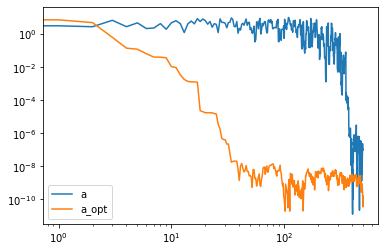

In [48]:
plt.loglog(np.array(error_CSPSA[:]).T,label='a')
plt.loglog(np.array(error_CSPSA2[:]).T,label='a_opt')
plt.legend()

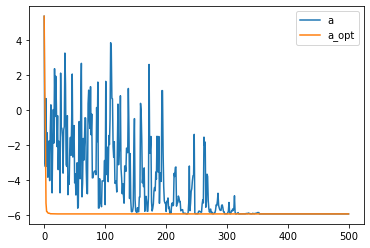

In [49]:
plt.plot(np.array(Result_CSPSA[:]).T,label='a')
plt.plot(np.array(Result_CSPSA2[:]).T,label='a_opt')
plt.legend()